In [377]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from imblearn.over_sampling import RandomOverSampler, SMOTE 
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier

plt.style.use('fivethirtyeight')

### Import and preprocess the data

In [378]:
# Import each page of the workbook
df1 = pd.read_excel('stock portfolio performance data set.xlsx', sheet_name='1st period',header=1)
df2 = pd.read_excel('stock portfolio performance data set.xlsx', sheet_name='2nd period',header=1)
df4 = pd.read_excel('stock portfolio performance data set.xlsx', sheet_name='4th period',header=1)


In [379]:
# Set train/test data
train_data = pd.concat([df1, df2, df3], ignore_index=True)
test_data = pd.read_excel('stock portfolio performance data set.xlsx', sheet_name='3rd period',header=1)


In [380]:
train_data = train_data.rename(columns={' Large Return Rate in the last quarter ':'Lrg Return Rate Last Qtr'})

In [381]:
test_data.isna().sum()

ID                                         0
 Large B/P                                 0
 Large ROE                                 0
 Large S/P                                 0
 Large Return Rate in the last quarter     0
 Large Market Value                        0
 Small systematic Risk                     0
Annual Return                              0
Excess Return                              0
Systematic Risk                            0
Total Risk                                 0
Abs. Win Rate                              0
Rel. Win Rate                              0
Annual Return.1                            0
Excess Return.1                            0
Systematic Risk.1                          0
Total Risk.1                               0
Abs. Win Rate.1                            0
Rel. Win Rate.1                            0
dtype: int64

In [382]:
test_data.columns

Index(['ID', ' Large B/P ', ' Large ROE ', ' Large S/P ',
       ' Large Return Rate in the last quarter ', ' Large Market Value ',
       ' Small systematic Risk', 'Annual Return', 'Excess Return',
       'Systematic Risk', 'Total Risk', 'Abs. Win Rate', 'Rel. Win Rate',
       'Annual Return.1', 'Excess Return.1', 'Systematic Risk.1',
       'Total Risk.1', 'Abs. Win Rate.1', 'Rel. Win Rate.1'],
      dtype='object')

In [383]:
# Convert columns from decimal to percent
columns_to_convert = ['Annual Return', 'Excess Return','Total Risk', 'Abs. Win Rate', 'Rel. Win Rate']

# Apply the conversion for each column in the list
for column in columns_to_convert:
    train_data[column] = train_data[column].apply(lambda x: x * 100)

In [384]:
columns_to_convert = ['Annual Return', 'Excess Return','Total Risk', 'Abs. Win Rate', 'Rel. Win Rate']

# Apply the conversion for each column in the list
for column in columns_to_convert:
    test_data[column] = test_data[column].apply(lambda x: x * 100)

In [385]:
test_data.head()

,ID,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return,Excess Return,Systematic Risk,Total Risk,Abs. Win Rate,Rel. Win Rate,Annual Return.1,Excess Return.1,Systematic Risk.1,Total Risk.1,Abs. Win Rate.1,Rel. Win Rate.1
0,16,0.0,0.0,0.0,0.500,0.500,0.000,-0.722031,0.489654,1.141957,11.947129,55.0,70.0,0.200000,0.200000,0.433672,0.450029,0.285714,0.500
1,4,0.0,0.0,0.0,1.000,0.000,0.000,0.208557,1.247046,1.437964,15.974539,50.0,55.0,0.218169,0.263772,0.680969,0.764019,0.200000,0.275
2,41,0.0,0.0,0.0,0.333,0.333,0.333,1.159069,1.204357,1.309188,14.060502,50.0,50.0,0.236728,0.260177,0.573384,0.614795,0.200000,0.200
3,5,0.0,0.0,0.0,0.000,1.000,0.000,3.052629,1.232798,1.109287,10.452017,60.0,75.0,0.273698,0.262572,0.406379,0.333465,0.371429,0.575
4,21,0.0,0.0,0.0,0.000,0.500,0.500,5.605155,2.065434,1.311970,12.638235,60.0,65.0,0.323535,0.332679,0.575709,0.503910,0.371429,0.425


In [386]:
# Set a threshold value for the annual return to determine if it was positive or negative
threshold = 0.00

# Create a new column called "Label" that contains the binary labels for a positive or negative annual return
train_data['Label'] = train_data['Annual Return'].apply(lambda x: 1 if x > threshold else 0)
test_data['Label'] = test_data['Annual Return'].apply(lambda x: 1 if x > threshold else 0)

### Plot the feature relationships of the training data
To visualize how they interact with one another

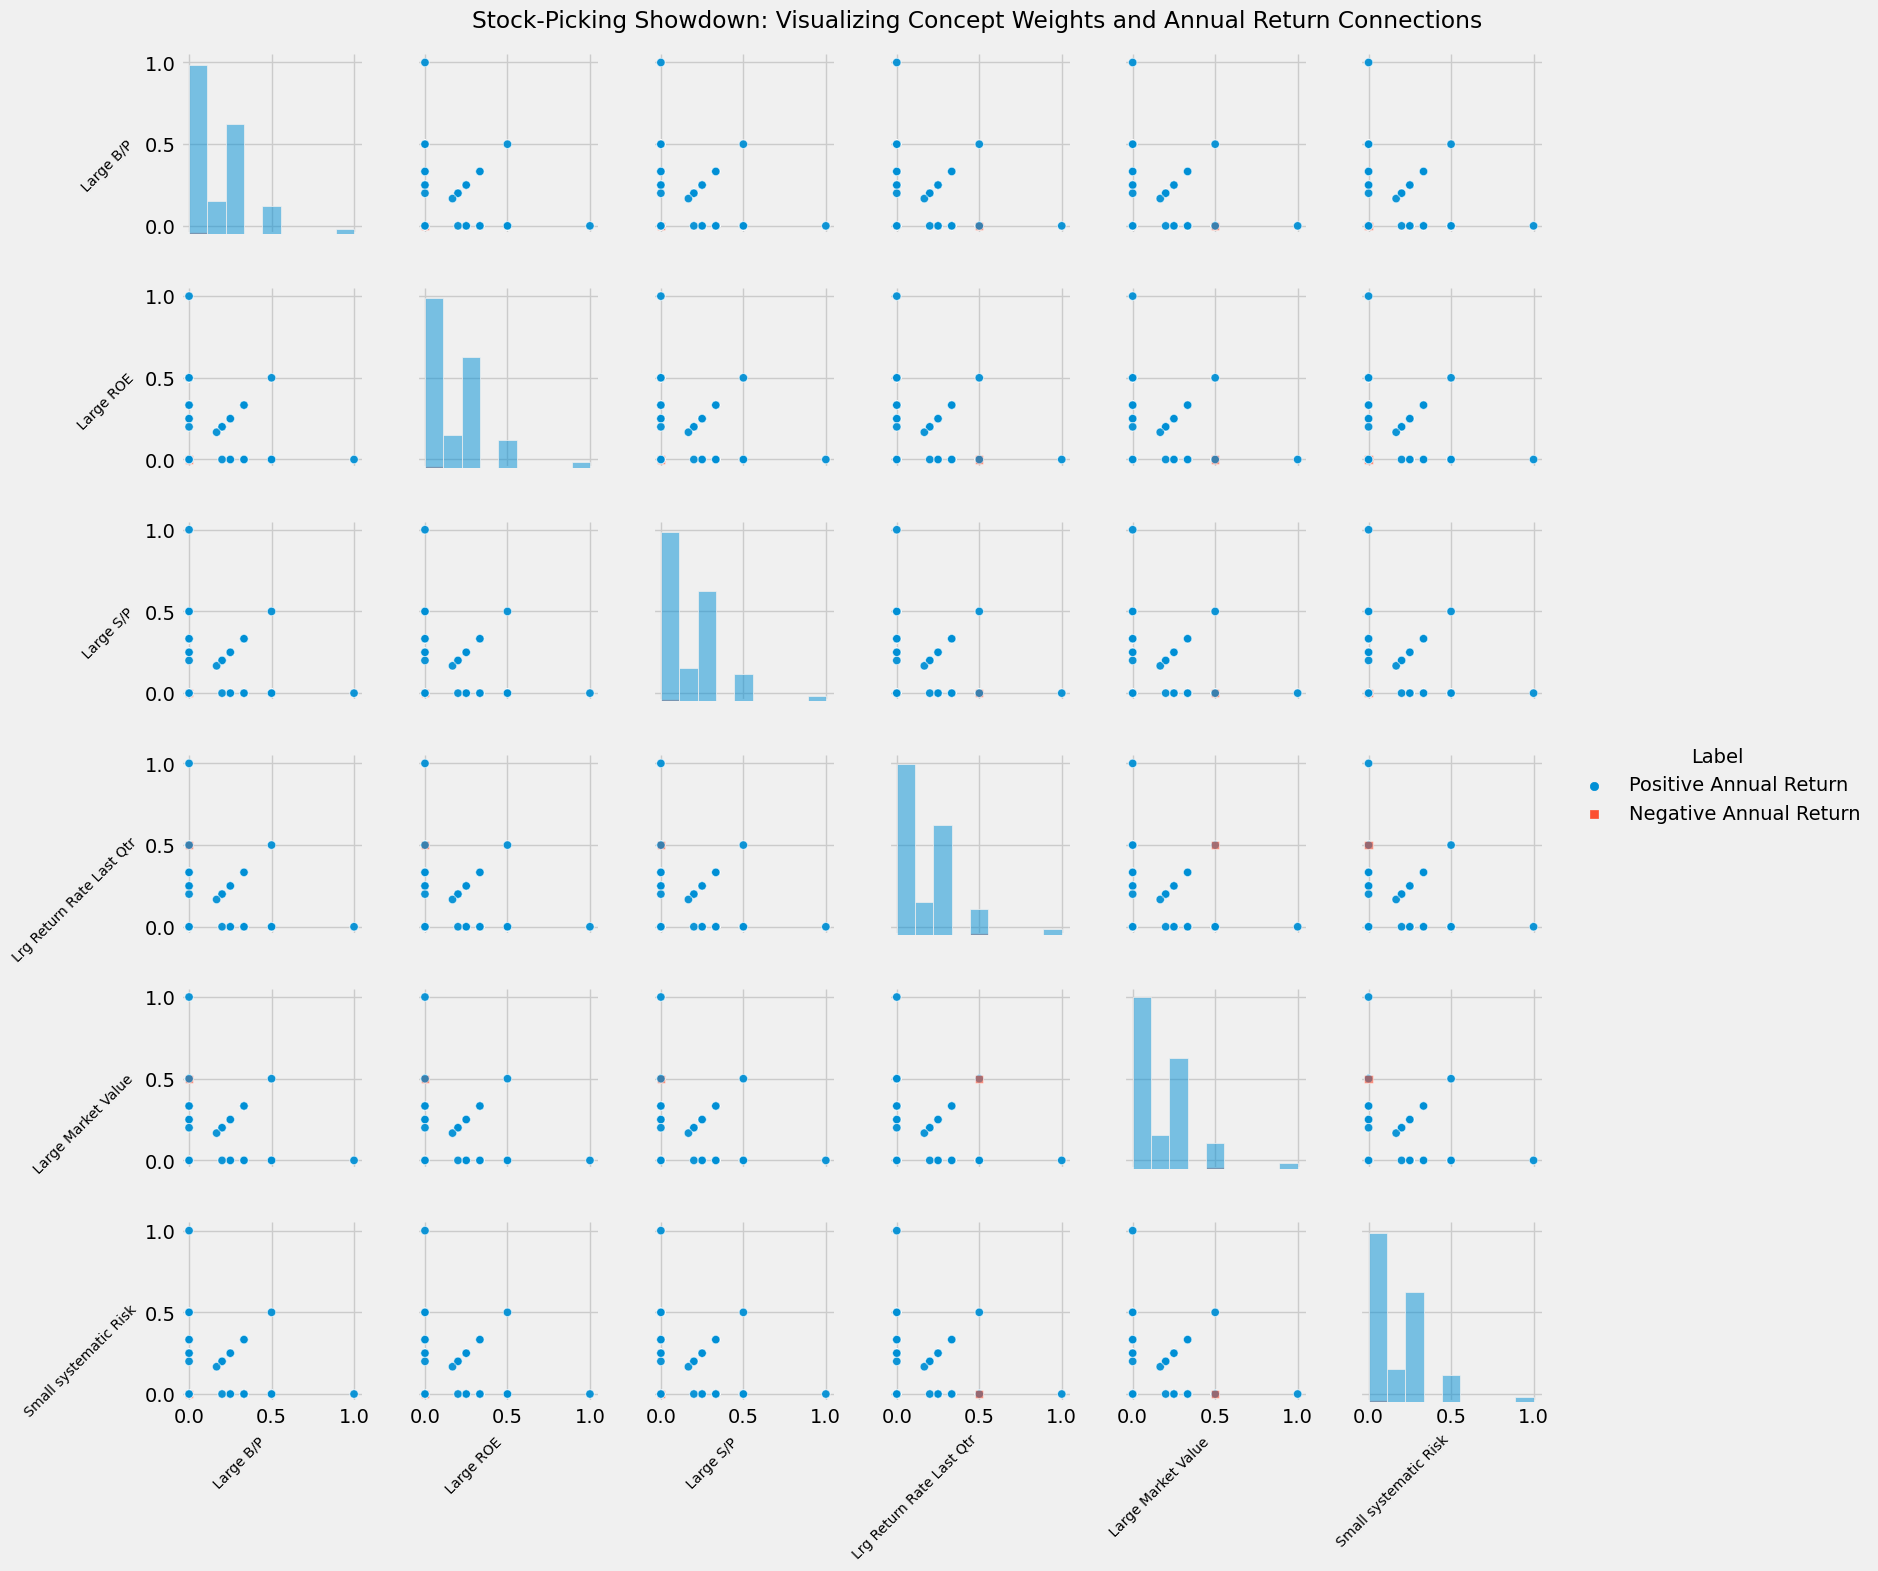

In [387]:
# Create a pair plot

# Create a DataFrame with features and labels combined
train_data_paired = train_data.iloc[:, 1:7]

# Replace binary labels with the desired string values
train_data_paired['Label'] = train_data['Label'].map({1: 'Positive Annual Return', 0: 'Negative Annual Return'})

# Plot the pair plot
pair_plot = sns.pairplot(train_data_paired, hue='Label', markers=['o', 's'], diag_kind='hist', plot_kws={'alpha': 0.6},
                         height=2.5, aspect=1)

# Adjust the spacing between subplots at at the top of the figure
plt.subplots_adjust(left=None, bottom=None, right=None, top=0.95, wspace=0.3, hspace=0.3)

# Rotate x-axis feature labels
for ax in pair_plot.axes.flat:
    ax.xaxis.label.set(rotation=45, ha='right', fontsize=10)

# Rotate y-axis feature labels
for ax in pair_plot.axes.flat:
    ax.yaxis.label.set(rotation=45,ha='right',fontsize=10)

# Set the figure title
plt.suptitle("Stock-Picking Showdown: Visualizing Concept Weights and Annual Return Connections") 

# Save the figure
plt.savefig('/Users/laceymorgan/Desktop/Stock_predictions/feature_pair_plot.png',dpi=300, bbox_inches='tight')

plt.show() 
# The diagonal plots are histograms of each feature, while the off-diagonal plots are scatter plots between pairs of features.

### Train the model

In [388]:
# Separate the features and the labels
type_label = train_data['Label'].tolist()
df_features = train_data.iloc[:, 1:7].values.tolist()

# Create RandomOverSampler 
ros = RandomOverSampler(random_state=44)
df_features_resampled, type_label_resampled = ros.fit_resample(df_features, type_label)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1, 10],
    'class_weight': [{0: 20, 1: 1},{0: 50, 1: 1}, {0: 100, 1: 1}, 'balanced', None]
}

# Create an SVM model 
model = svm.SVC()

# Create a GridSearchCV object with the SVM model and the parameter grid
grid_search = GridSearchCV(model, param_grid, scoring='f1_macro', cv=5, n_jobs=-1)

# Fit the GridSearchCV object on the resampled training data
grid_search.fit(df_features_resampled, type_label_resampled)

# Print the best hyperparameters found by GridSearchCV
print("Best hyperparameters:", grid_search.best_params_)

# Get the best model
svm_best_model = grid_search.best_estimator_

# Fit the best model on the resampled training data
svm_best_model.fit(df_features_resampled, type_label_resampled)


Best hyperparameters: {'C': 0.1, 'class_weight': {0: 20, 1: 1}, 'gamma': 'scale', 'kernel': 'poly'}


SVC(C=0.1, class_weight={0: 20, 1: 1}, kernel='poly')

### Test the Support Vector Model

In [389]:
# Extract the features from the test_data 
test_features = test_data.iloc[:, 1:7].values.tolist()

# Use the trained SVM model to make predictions on the test_data
test_predictions = svm_best_model.predict(test_features)

# Extract the 'Label' from the test_data
test_labels = test_data['Label'].tolist()

### Evaluate the Performance of the SVM Model

In [399]:
# Calculate the accuracy of the model on the test_data
accuracy = accuracy_score(test_labels, test_predictions)
print(f'Suppport Vector Machine Accuracy on test_data (period 4): {accuracy}')

# Print a classification report
report = classification_report(test_labels, test_predictions)
print('Suppport Vector Machine Classification Report:')
print(report)

Suppport Vector Machine Accuracy on test_data (period 4): 1.0
Suppport Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00        62

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



### Test the Balanced Random Forest Classifier Model

In [391]:
# Resample the training data to handle class imbalance
ros = RandomOverSampler(random_state=42)
df_features_resampled, type_label_resampled = ros.fit_resample(df_features, type_label)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Create a BalancedRandomForestClassifier
model = BalancedRandomForestClassifier(random_state=42)

# Create a GridSearchCV object with the model and the parameter grid
grid_search = GridSearchCV(model, param_grid, scoring='f1_macro', cv=5, n_jobs=-1)

# Fit the GridSearchCV object on the resampled training data
grid_search.fit(df_features_resampled, type_label_resampled)

# Print the best hyperparameters found by GridSearchCV
print("Best hyperparameters:", grid_search.best_params_)

# Get the best model
br_best_model = grid_search.best_estimator_

# Fit the best model on the resampled training data
br_best_model.fit(df_features_resampled, type_label_resampled)


Best hyperparameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


BalancedRandomForestClassifier(max_features='auto', n_estimators=50,
                               random_state=42)

### Evaluate the performance of the BRF model

In [392]:
# Extract the features from the test_data 
br_test_features = test_data.iloc[:, 1:7].values.tolist()

# Use the trained SVM model to make predictions on the test_data
br_test_predictions = br_best_model.predict(br_test_features)

# Extract the 'Label' from the test_data
br_test_labels = test_data['Label'].tolist()

In [393]:
# Calculate the accuracy of the model on the test_data
accuracy = accuracy_score(br_test_labels, br_test_predictions)
print(f'Balanced Random Forest Accuracy on test_data (period 3): {accuracy}')

# Print a classification report
report = classification_report(br_test_labels, br_test_predictions)
print('Balanced Random Forest Classification Report:')
print(report)

Balanced Random Forest Accuracy on test_data (period 3): 1.0
Balanced Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00        62

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



## Test the Easy Ensemble Classifier model

In [394]:

# Separate the features and the labels
type_label = train_data['Label'].tolist()
df_features = train_data.iloc[:, 1:7].values.tolist()

# Resample the training data to handle class imbalance
ros = RandomOverSampler(random_state=42)
df_features_resampled, type_label_resampled = ros.fit_resample(df_features, type_label)

# Create an AdaBoostClassifier instance
estimator = AdaBoostClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [10, 50, 100],
    'estimator': [estimator],
    'estimator__n_estimators': [50, 100]
}

# Create an EasyEnsembleClassifier
model = EasyEnsembleClassifier(random_state=42)

# Create a GridSearchCV object with the model and the parameter grid
grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=5, n_jobs=-1)

# Fit the GridSearchCV object on the resampled training data
grid_search.fit(df_features_resampled, type_label_resampled)

# Print the best hyperparameters found by GridSearchCV
print("Best hyperparameters:", grid_search.best_params_)

# Get the best model
ee_best_model = grid_search.best_estimator_

# Fit the best model on the resampled training data
ee_best_model.fit(df_features_resampled, type_label_resampled)


Best hyperparameters: {'estimator': AdaBoostClassifier(random_state=42), 'estimator__n_estimators': 50, 'n_estimators': 10}


EasyEnsembleClassifier(estimator=AdaBoostClassifier(random_state=42),
                       random_state=42)

### Evaluate the Performance of the EE Model

In [395]:
# Extract the features from the test_data 
ee_test_features = test_data.iloc[:, 1:7].values.tolist()

# Use the trained SVM model to make predictions on the test_data
ee_test_predictions = ee_best_model.predict(test_features)

# Extract the 'Label' from the test_data
ee_test_labels = test_data['Label'].tolist()

In [396]:
# Calculate the accuracy of the model on the test_data
accuracy = accuracy_score(ee_test_labels, ee_test_predictions)
print(f'Easy Ensemble Accuracy on test_data (period 3): {accuracy}')

# Print a classification report
report = classification_report(ee_test_labels, ee_test_predictions)
print('Easy Ensemble Classification Report:')
print(report)

Easy Ensemble Accuracy on test_data (period 3): 1.0
Easy Ensemble Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00        62

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



### Predict the label for new data

The function takes one of the ml models (possible models are svm_best_model, br_best_model, ee_best_model) and a new set of X1 - X6 to determine if the Y1 will be a positive or negative annual return based on the threshold. 

In [400]:
# Create a function to predict a positive or negative anual outcome base on new X1-X6 data

def predict_annual_return(model, X1, X2, X3, X4, X5, X6):
    # Create a new data point with the given X1-X6 values
    new_data = [[X1, X2, X3, X4, X5, X6]]
    
    # Predict the label for the new data point
    label = model.predict(new_data)[0]  # Get the first (and only) element of the prediction
    
    # Print the predicted label
    if label == 1:
        print('The model predicts a positive annual return.')
    else:
        print('The model predicts a negative annual return.')


In [401]:
predict_annual_return(best_ee_model, 0, 0, 0, 0.5, 0.5, 0 )

The model predicts a negative annual return.
